In [ ]:
!pip install requests


In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    'vs_currency': 'usd',
    'order': 'market_cap_desc',
    'per_page': 100,
    'page': 1,
    'sparkline': 'false'
}

response = requests.get(url, params=params)
data = response.json()


In [ ]:
with open('coins.json', 'w') as f:
    json.dump(data, f)


In [ ]:
df = pd.DataFrame(data)
df.head()


,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,115850.00,2304496611886,1,2304496611886,8.735513e+10,119370.000,...,1.989729e+07,2.100000e+07,122838.00,-5.75971,2025-07-14T07:56:01.937Z,67.810000,1.706190e+05,2013-07-06T00:00:00.000Z,None,2025-07-25T16:13:37.140Z
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,3638.84,439013670836,2,439013670836,4.729706e+10,3750.710,...,1.207110e+08,NaN,4878.26,-25.56935,2021-11-10T14:24:19.604Z,0.432979,8.384909e+05,2015-10-20T00:00:00.000Z,"{'times': 40.97812212014722, 'currency': 'btc'...",2025-07-25T16:13:38.233Z
2,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,3.05,180359196909,3,304413985175,9.171331e+09,3.250,...,9.998590e+10,1.000000e+11,3.65,-16.66341,2025-07-18T03:40:53.808Z,0.002686,1.130248e+05,2014-05-22T00:00:00.000Z,None,2025-07-25T16:13:34.456Z
3,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,1.00,163056852865,4,163056852865,1.760389e+11,1.001,...,1.630486e+11,NaN,1.32,-24.41822,2018-07-24T00:00:00.000Z,0.572521,7.466939e+01,2015-03-02T00:00:00.000Z,None,2025-07-25T16:13:35.388Z
4,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,766.45,106714901224,5,106714901224,1.734405e+09,784.630,...,1.392887e+08,2.000000e+08,808.09,-5.29560,2025-07-23T12:05:14.614Z,0.039818,1.921905e+06,2017-10-19T00:00:00.000Z,None,2025-07-25T16:13:36.666Z


In [ ]:
df.describe()
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                100 non-null    object 
 1   symbol                            100 non-null    object 
 2   name                              100 non-null    object 
 3   image                             100 non-null    object 
 4   current_price                     100 non-null    float64
 5   market_cap                        100 non-null    int64  
 6   market_cap_rank                   100 non-null    int64  
 7   fully_diluted_valuation           100 non-null    int64  
 8   total_volume                      100 non-null    float64
 9   high_24h                          100 non-null    float64
 10  low_24h                           100 non-null    float64
 11  price_change_24h                  100 non-null    float64
 12  price_cha

Index(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap',
       'market_cap_rank', 'fully_diluted_valuation', 'total_volume',
       'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi',
       'last_updated'],
      dtype='object')

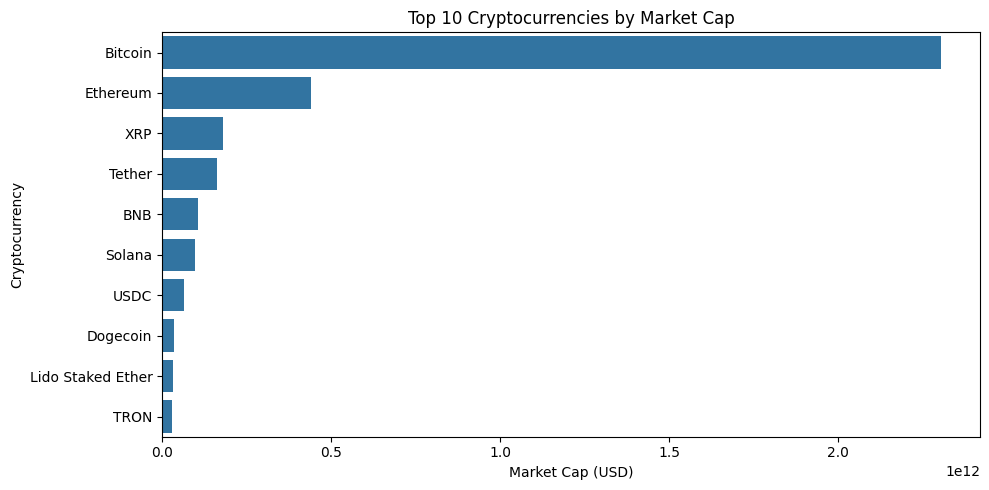

In [ ]:
top10 = df.nlargest(10, 'market_cap')[['name', 'market_cap']]
plt.figure(figsize=(10, 5))
sns.barplot(data=top10, x='market_cap', y='name')
plt.title("Top 10 Cryptocurrencies by Market Cap")
plt.xlabel("Market Cap (USD)")
plt.ylabel("Cryptocurrency")
plt.tight_layout()
plt.show()


/tmp/ipython-input-9-3193746479.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gainers, x='price_change_percentage_24h', y='name', palette='Greens_d')


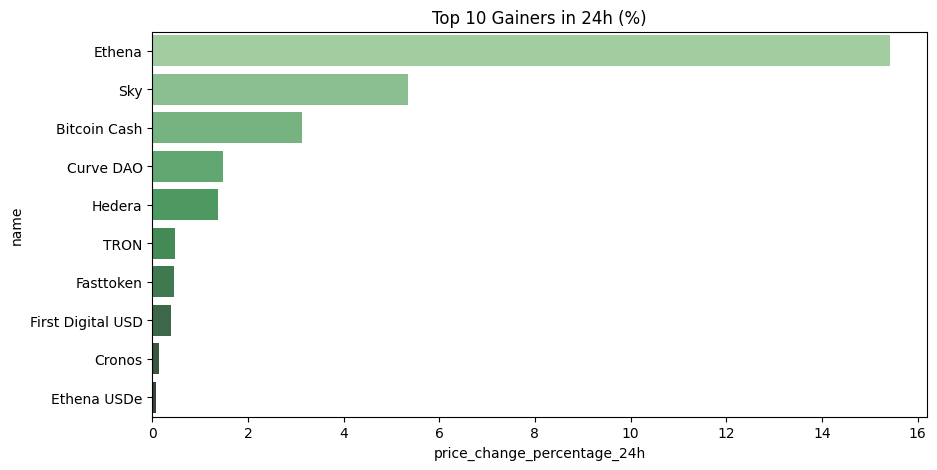

/tmp/ipython-input-9-3193746479.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=losers, x='price_change_percentage_24h', y='name', palette='Reds_d')


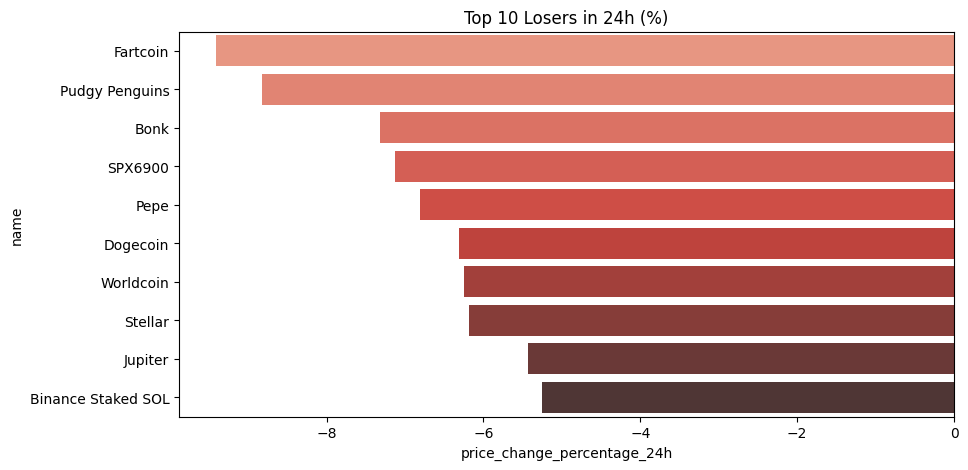

In [ ]:
# Gainers
gainers = df.nlargest(10, 'price_change_percentage_24h')[['name', 'price_change_percentage_24h']]
plt.figure(figsize=(10, 5))
sns.barplot(data=gainers, x='price_change_percentage_24h', y='name', palette='Greens_d')
plt.title("Top 10 Gainers in 24h (%)")
plt.show()

# Losers
losers = df.nsmallest(10, 'price_change_percentage_24h')[['name', 'price_change_percentage_24h']]
plt.figure(figsize=(10, 5))
sns.barplot(data=losers, x='price_change_percentage_24h', y='name', palette='Reds_d')
plt.title("Top 10 Losers in 24h (%)")
plt.show()
